<a href="https://colab.research.google.com/github/rick77777/Coding/blob/master/A1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Average Accuracy : 0.63
Average Precision: 0.53
Average Recall: 0.53
Average F1 Score : 0.54
Average AUC Score : 0.62



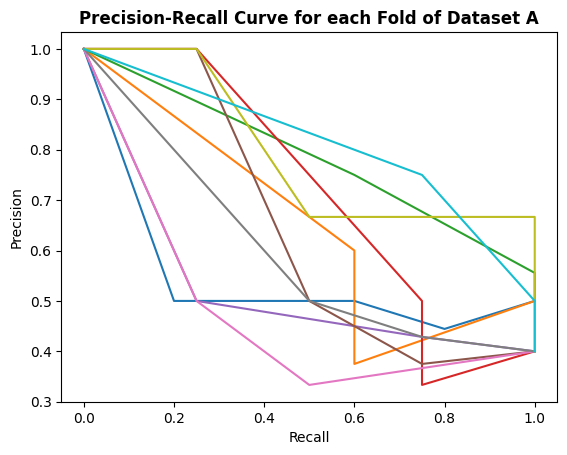

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Reading the Data
data_A = pd.read_csv('A1_dataA.tsv',sep='\t')
data_B = pd.read_csv('A1_dataB.tsv',sep='\t')

X_A = data_A.drop('class', axis = 1)
X_B = data_B.drop('class', axis = 1)
Y_A = data_A['class']
Y_B = data_B['class']

# KNN Model for Dataset A

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=117)

# Lists to store metrics
all_y_true = []
all_y_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc = []

fold = 0
# Perform 10-fold stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_A, Y_A):
    X_train, X_test = X_A.iloc[train_index], X_A.iloc[test_index]
    y_train, y_test = Y_A.iloc[train_index], Y_A.iloc[test_index]

    # Train the KNN classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

    # Store true labels and predicted scores for each fold
    all_y_true.extend(y_test)
    all_y_scores.extend(y_pred_prob)

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    acc_score = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    auc_sc = roc_auc_score(y_test, y_pred_prob)

    # Plot Precision-Recall curve for each fold
    plt.plot(recall, precision, lw=1.5)
    fold += 1
    accuracies.append(acc_score)
    f1_scores.append(f1_sc)
    auc.append(auc_sc)

# Calculate and display average metrics
avg_precision = average_precision_score(all_y_true, all_y_scores)
avg_recall = recall_score(all_y_true, (np.array(all_y_scores) > 0.5).astype(int))
print(f'\nAverage Accuracy : {np.mean(accuracies):.2f}')
print(f'Average Precision: {avg_precision:.2f}')
print(f'Average Recall: {avg_recall:.2f}')
print(f'Average F1 Score : {np.mean(f1_scores):.2f}')
print(f'Average AUC Score : {np.mean(auc):.2f}\n')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Fold of Dataset A', fontweight='bold')
plt.show()


Average Accuracy : 0.82
Average Precision: 0.88
Average Recall: 0.74
Average F1 Score : 0.79
Average AUC Score : 0.92



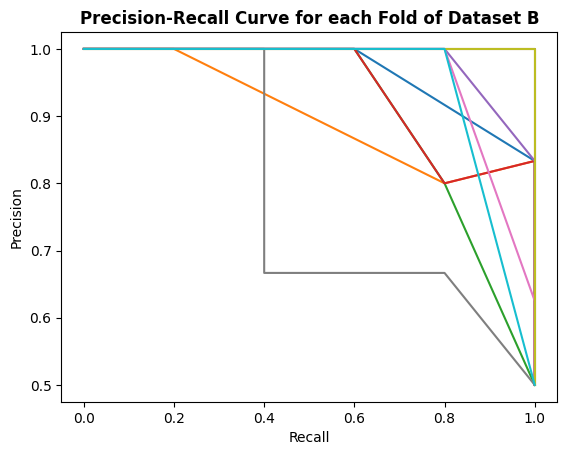

In [ ]:
# KNN Model for Dataset B

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=117)

# Lists to store metrics
all_y_true = []
all_y_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc = []

fold = 0
# Perform 10-fold stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_B, Y_B):
    X_train, X_test = X_B.iloc[train_index], X_B.iloc[test_index]
    y_train, y_test = Y_B.iloc[train_index], Y_B.iloc[test_index]

    # Train the KNN classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

    # Store true labels and predicted scores for each fold
    all_y_true.extend(y_test)
    all_y_scores.extend(y_pred_prob)

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    acc_score = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    auc_sc = roc_auc_score(y_test, y_pred_prob)

    # print(f"============================================= Fold {fold} =============================================\n")
    # print(f"Accuracy : {acc_score:0.2f}, F1 Score : {f1_sc:0.2f} ")

    # Plot Precision-Recall curve for each fold
    plt.plot(recall, precision, lw=1.5)
    fold += 1
    accuracies.append(acc_score)
    f1_scores.append(f1_sc)
    auc.append(auc_sc)

# Calculate and display average metrics
avg_precision = average_precision_score(all_y_true, all_y_scores)
avg_recall = recall_score(all_y_true, (np.array(all_y_scores) > 0.5).astype(int))
print(f'\nAverage Accuracy : {np.mean(accuracies):.2f}')
print(f'Average Precision: {avg_precision:.2f}')
print(f'Average Recall: {avg_recall:.2f}')
print(f'Average F1 Score : {np.mean(f1_scores):.2f}')
print(f'Average AUC Score : {np.mean(auc):.2f}\n')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Fold of Dataset B', fontweight='bold')
plt.show()

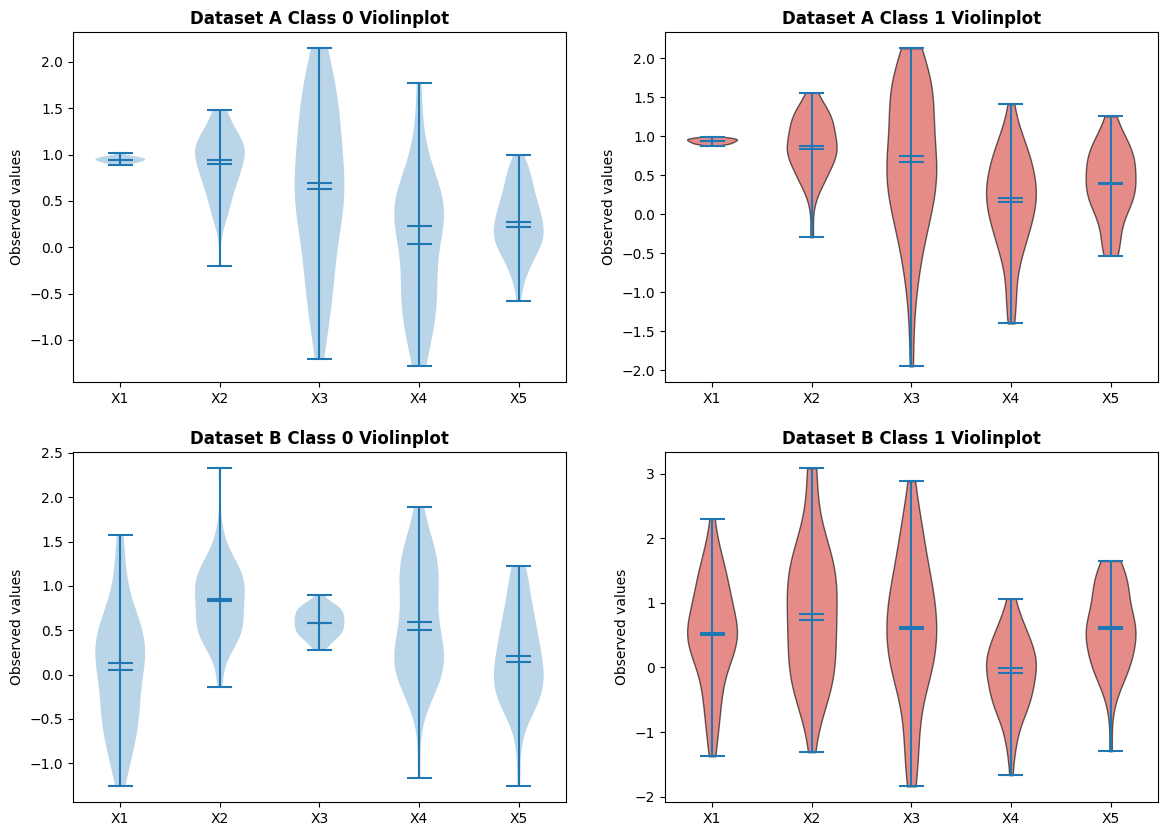

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
labels = ['X1', 'X2', 'X3', 'X4', 'X5']

X_A_0 = data_A[Y_A == 0].drop('class', axis = 1)
X_A_1 = data_A[Y_A == 1].drop('class', axis = 1)
X_B_0 = data_B[Y_B == 0].drop('class', axis = 1)
X_B_1 = data_B[Y_B == 1].drop('class', axis = 1)

axs[0,0].set_title('Dataset A Class 0 Violinplot', fontsize=12, fontweight='bold')
axs[0,0].violinplot(X_A_0, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[0,0].set_ylabel('Observed values')

axs[0,1].set_title('Dataset A Class 1 Violinplot', fontsize=12, fontweight='bold')
parts_A = axs[0,1].violinplot(X_A_1, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[0,1].set_ylabel('Observed values')

for pc in parts_A['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

axs[1,0].set_title('Dataset B Class 0 Violinplot', fontsize=12, fontweight='bold')
axs[1,0].violinplot(X_B_0, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[1,0].set_ylabel('Observed values')

axs[1,1].set_title('Dataset B Class 1 Violinplot', fontsize=12, fontweight='bold')
parts_B = axs[1,1].violinplot(X_B_1, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[1,1].set_ylabel('Observed values')

for pc in parts_B['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)


axs[0,0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[0,1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1,0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1,1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)


Text(0, 0.5, 'Observed values')

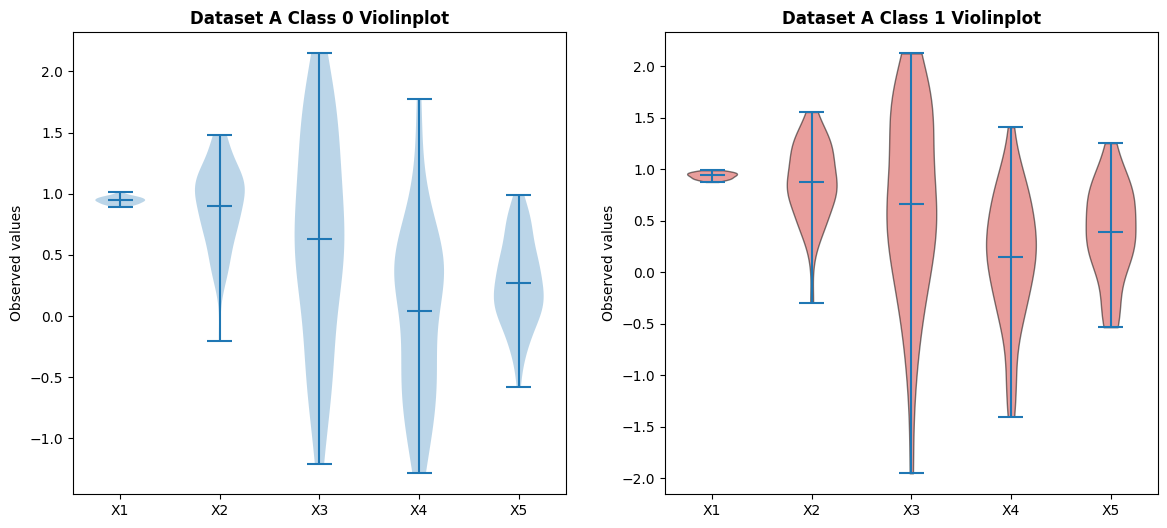

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
labels = ['X1', 'X2', 'X3', 'X4', 'X5']

axs[0].set_title('Dataset A Class 0 Violinplot', fontsize=12, fontweight='bold')
axs[0].violinplot(X_A_0, [1,2,3,4,5], showmeans=True, showextrema=True)
axs[0].set_ylabel('Observed values')

axs[1].set_title('Dataset A Class 1 Violinplot', fontsize=12, fontweight='bold')
parts_A = axs[1].violinplot(X_A_1, [1,2,3,4,5], showmeans=True, showextrema=True)


for pc in parts_A['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

axs[0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1].set_ylabel('Observed values')

<ipython-input-5-19b25aaa4ac3>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['X1'], hist = True, kde = True, kde_kws = {'fill': True,'linewidth': 2.5}, label = c,ax=ax1)
<ipython-input-5-19b25aaa4ac3>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['X1'], hist = True, kde = T

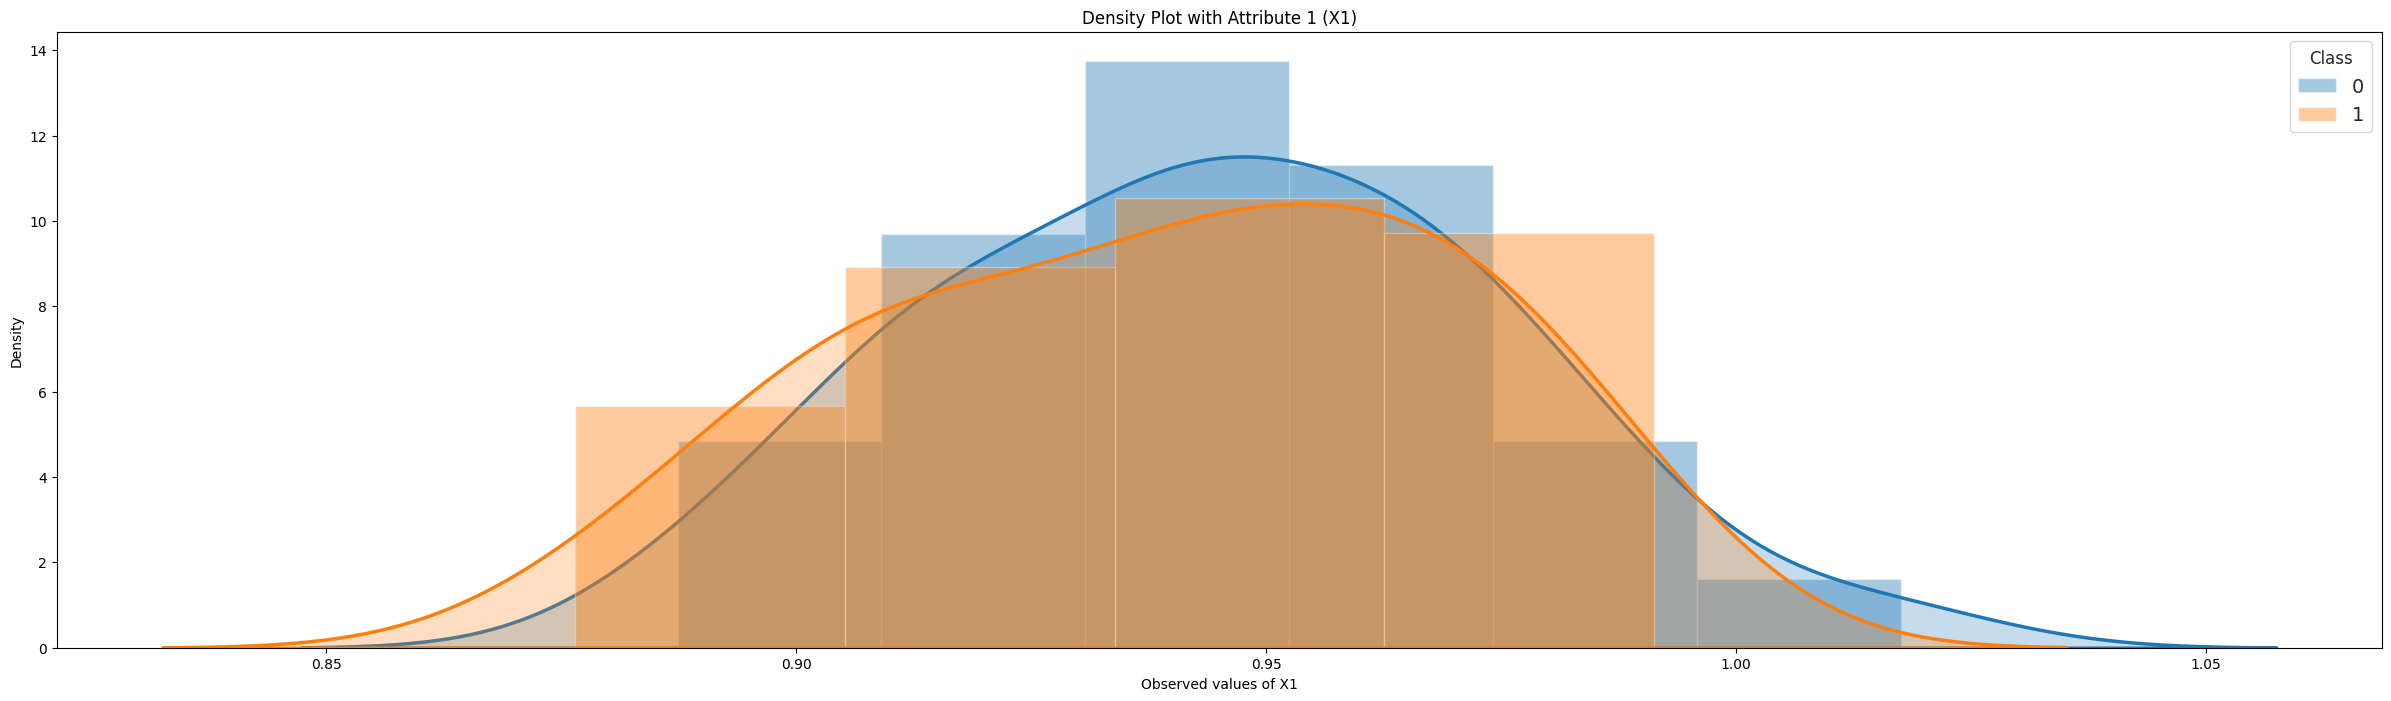

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(30, 8))
sns.set(style="white")
class_ct = [0,1]
# Iterate through each class
    # Draw the density plot
'''
for i in ['X1', 'X2', 'X3', 'X4', 'X5']:
  for c in class_ct:
    subset = data_A[data_A['class'] == c]
    sns.distplot(subset[i], hist = False, kde = True, kde_kws = {'fill': True,'linewidth': 2.5}, label = c)
    ax[int(i[1])-1].set_title('Density Plot with Attribute 1 ()')
    ax[int(i[1])-1].legend(prop={'size': 14}, title = 'Class')
    ax[int(i[1])-1].set_xlabel('Observed values of X')
    ax[int(i[1])-1].set_ylabel('Density')
'''

for c in class_ct:
    subset = data_A[data_A['class'] == c]
    sns.distplot(subset['X1'], hist = True, kde = True, kde_kws = {'fill': True,'linewidth': 2.5}, label = c,ax=ax1)
    ax1.set_title('Density Plot with Attribute 1 (X1)')
    ax1.legend(prop={'size': 14}, title = 'Class')
    ax1.set_xlabel('Observed values of X1')
    ax1.set_ylabel('Density')

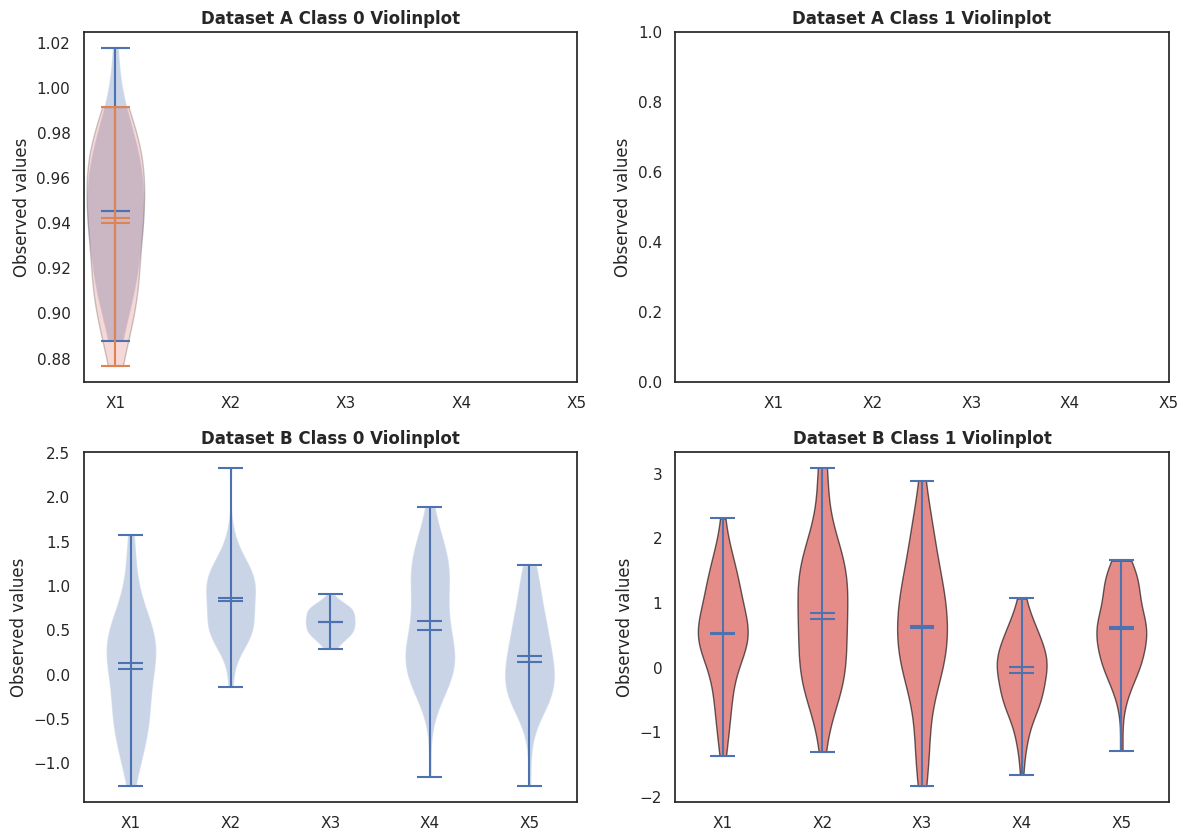

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
labels = ['X1', 'X2', 'X3', 'X4', 'X5']

X_A_0 = data_A[Y_A == 0].drop('class', axis = 1)
X_A_1 = data_A[Y_A == 1].drop('class', axis = 1)
X_B_0 = data_B[Y_B == 0].drop('class', axis = 1)
X_B_1 = data_B[Y_B == 1].drop('class', axis = 1)

axs[0,0].set_title('Dataset A Class 0 Violinplot', fontsize=12, fontweight='bold')
axs[0,0].violinplot(X_A_0['X1'], [1], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
parts_A = axs[0,0].violinplot(X_A_1['X1'], [1], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[0,0].set_ylabel('Observed values')

axs[0,1].set_title('Dataset A Class 1 Violinplot', fontsize=12, fontweight='bold')

axs[0,1].set_ylabel('Observed values')

for pc in parts_A['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.2)

axs[1,0].set_title('Dataset B Class 0 Violinplot', fontsize=12, fontweight='bold')
axs[1,0].violinplot(X_B_0, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[1,0].set_ylabel('Observed values')

axs[1,1].set_title('Dataset B Class 1 Violinplot', fontsize=12, fontweight='bold')
parts_B = axs[1,1].violinplot(X_B_1, [1,2,3,4,5], showmeans=True, showextrema=True, showmedians=True, bw_method='silverman')
axs[1,1].set_ylabel('Observed values')

for pc in parts_B['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)


axs[0,0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[0,1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1,0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
axs[1,1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)



Average Accuracy : 0.63
Average Precision: 0.53
Average Recall: 0.53
Average F1 Score : 0.54
Average AUC Score : 0.62



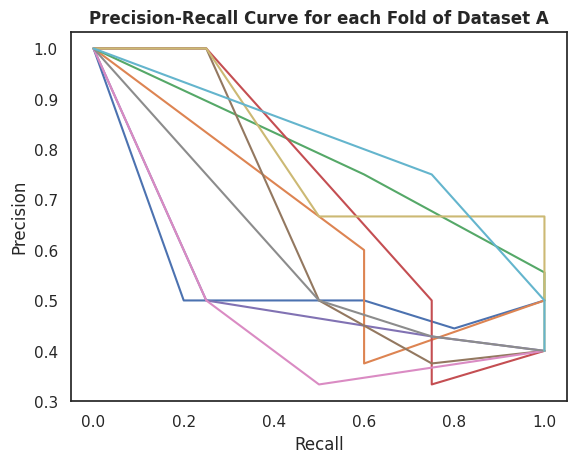


Average Accuracy : 0.82
Average Precision: 0.88
Average Recall: 0.74
Average F1 Score : 0.79
Average AUC Score : 0.92



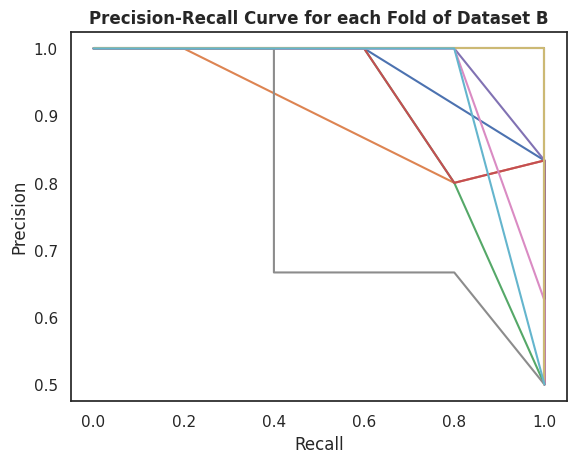

In [ ]:
# -*- coding: utf-8 -*-
"""A1_Final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1sc9QOVTCZueNW3k1Vh0kBk2aTubnS-8e
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Reading the Data

data_A = pd.read_csv('A1_dataA.tsv',sep='\t')
data_B = pd.read_csv('A1_dataB.tsv',sep='\t')

X_A = data_A.drop('class', axis = 1)
X_B = data_B.drop('class', axis = 1)
Y_A = data_A['class']
Y_B = data_B['class']

# KNN Model for Dataset A

# Initialize KNN classifier
# Using neighbors = 3 as per the manual grid search performed (n = 3 has 87.5% training score)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=117)

# Lists to store metrics
all_y_true = []
all_y_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc = []

# Perform 10-fold stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_A, Y_A):
    X_train, X_test = X_A.iloc[train_index], X_A.iloc[test_index]
    y_train, y_test = Y_A.iloc[train_index], Y_A.iloc[test_index]

    # Train the KNN classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

    # Store true labels and predicted scores for each fold
    all_y_true.extend(y_test)
    all_y_scores.extend(y_pred_prob)

    # Calculate Precision-Recall scores
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    acc_score = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    auc_sc = roc_auc_score(y_test, y_pred_prob)

    # Plot Precision-Recall curve for each fold
    plt.plot(recall, precision, lw=1.5)
    accuracies.append(acc_score)
    f1_scores.append(f1_sc)
    auc.append(auc_sc)

# Calculate and display average metric values
avg_precision = average_precision_score(all_y_true, all_y_scores)
avg_recall = recall_score(all_y_true, (np.array(all_y_scores) > 0.5).astype(int))
print(f'\nAverage Accuracy : {np.mean(accuracies):.2f}')
print(f'Average Precision: {avg_precision:.2f}')
print(f'Average Recall: {avg_recall:.2f}')
print(f'Average F1 Score : {np.mean(f1_scores):.2f}')
print(f'Average AUC Score : {np.mean(auc):.2f}\n')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Fold of Dataset A', fontweight='bold')
plt.show()


# KNN Model for Dataset B

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=117)

# Lists to store metrics
all_y_true = []
all_y_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc = []

# Perform 10-fold stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_B, Y_B):
    X_train, X_test = X_B.iloc[train_index], X_B.iloc[test_index]
    y_train, y_test = Y_B.iloc[train_index], Y_B.iloc[test_index]

    # Train the KNN classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

    # Store true labels and predicted scores for each fold
    all_y_true.extend(y_test)
    all_y_scores.extend(y_pred_prob)

    # Calculate Precision-Recall scores
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    acc_score = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    auc_sc = roc_auc_score(y_test, y_pred_prob)

    # Plot Precision-Recall curve for each fold
    plt.plot(recall, precision, lw=1.5)
    accuracies.append(acc_score)
    f1_scores.append(f1_sc)
    auc.append(auc_sc)

# Calculate and display average metric values
avg_precision = average_precision_score(all_y_true, all_y_scores)
avg_recall = recall_score(all_y_true, (np.array(all_y_scores) > 0.5).astype(int))
print(f'\nAverage Accuracy : {np.mean(accuracies):.2f}')
print(f'Average Precision: {avg_precision:.2f}')
print(f'Average Recall: {avg_recall:.2f}')
print(f'Average F1 Score : {np.mean(f1_scores):.2f}')
print(f'Average AUC Score : {np.mean(auc):.2f}\n')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Fold of Dataset B', fontweight='bold')
plt.show()